# Galton Data Analysis

## Standard Imports

In [33]:
# for managing dataframes
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

# Importing stats models
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

import scipy

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the data 

In [2]:
data = pd.read_csv("../data/galton-families.csv")

data.head()

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [4]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,934,NaN,NaN,NaN,467.5,269.767,1,234.25,467.5,700.75,934
family,934,205,185,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
father,934,NaN,NaN,NaN,69.1971,2.47648,62,68,69,71,78.5
mother,934,NaN,NaN,NaN,64.0893,2.29089,58,63,64,65.875,70.5
midparentHeight,934,NaN,NaN,NaN,69.2068,1.80237,64.4,68.14,69.248,70.14,75.43
children,934,NaN,NaN,NaN,6.17131,2.72903,1,4,6,8,15
childNum,934,NaN,NaN,NaN,3.58565,2.36141,1,2,3,5,15
gender,934,2,male,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
childHeight,934,NaN,NaN,NaN,66.7459,3.57925,56,64,66.5,69.7,79


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
Unnamed: 0         934 non-null int64
family             934 non-null object
father             934 non-null float64
mother             934 non-null float64
midparentHeight    934 non-null float64
children           934 non-null int64
childNum           934 non-null int64
gender             934 non-null object
childHeight        934 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [6]:
data.drop(["Unnamed: 0", "family"], axis=1, inplace=True)

In [7]:
data.isna().sum()

father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64

In [8]:
# Creating a mapper to change column type
type_map = {
    "gender": "category"
}
data = data.astype(type_map)
data.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

#### Real-valued features

##### Father's height

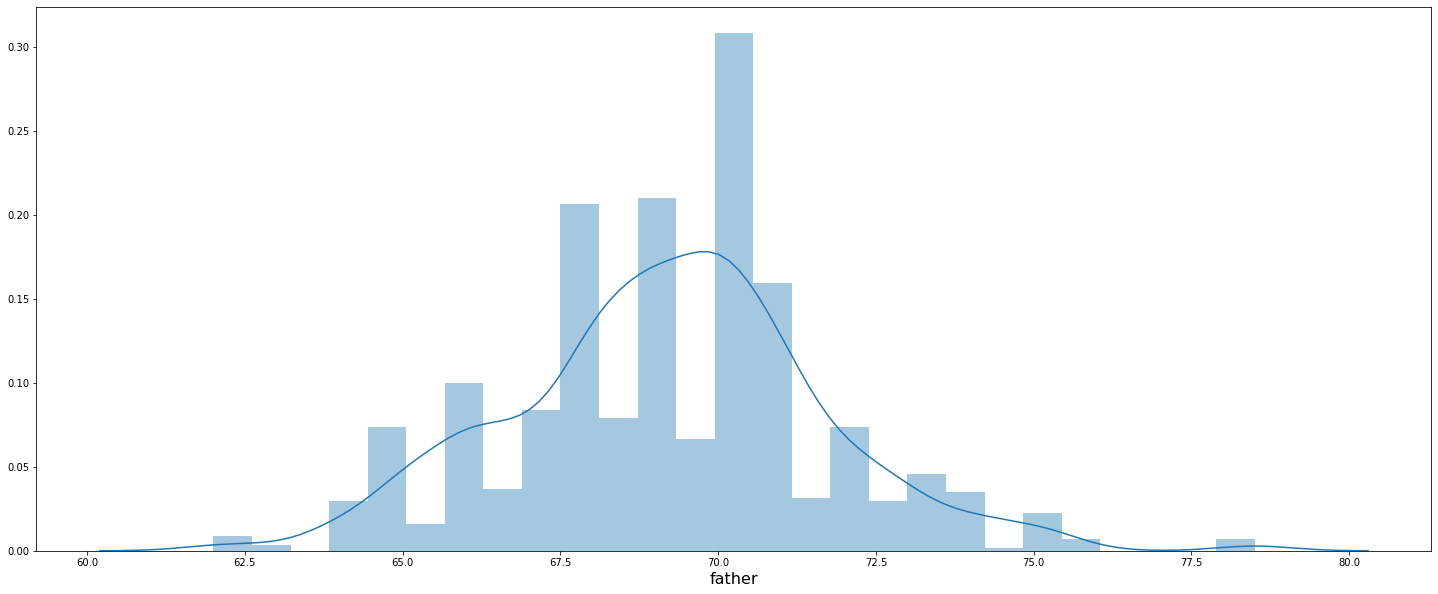

In [15]:
sns.distplot(data['father']);

##### Mother's height

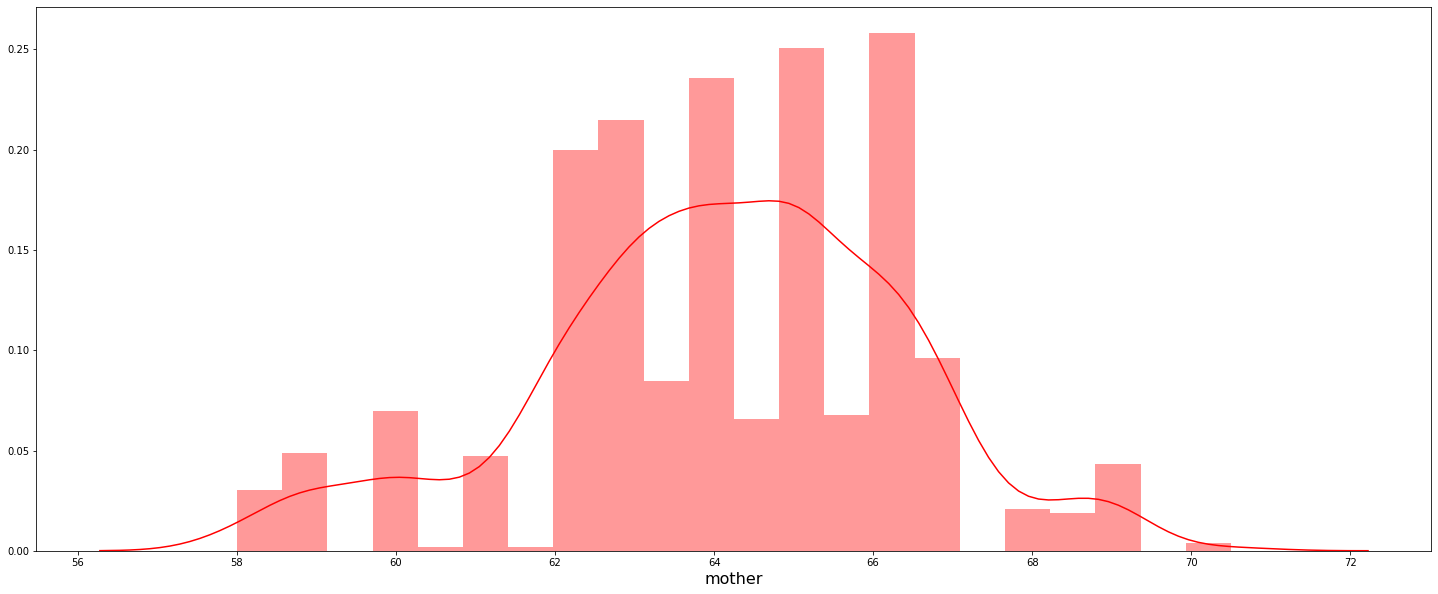

In [13]:
sns.distplot(data['mother'], color='red');

##### Mid-parent's height

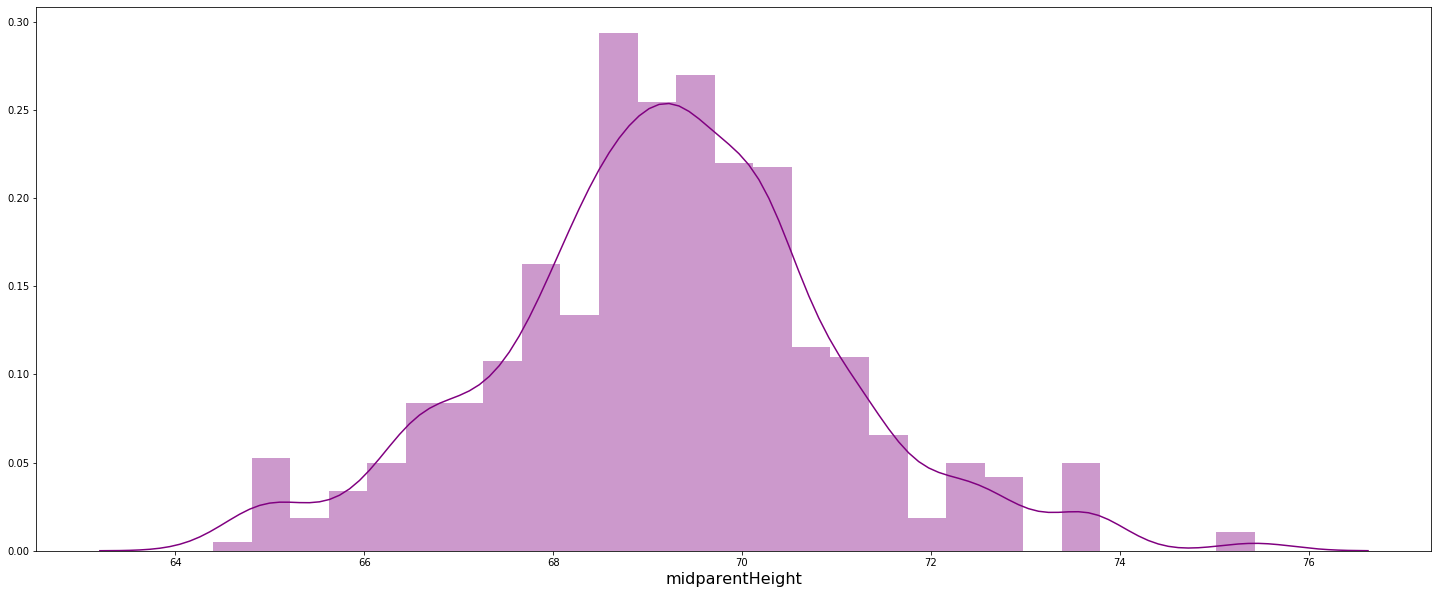

In [18]:
sns.distplot(data['midparentHeight'], color='purple');

##### Children's height

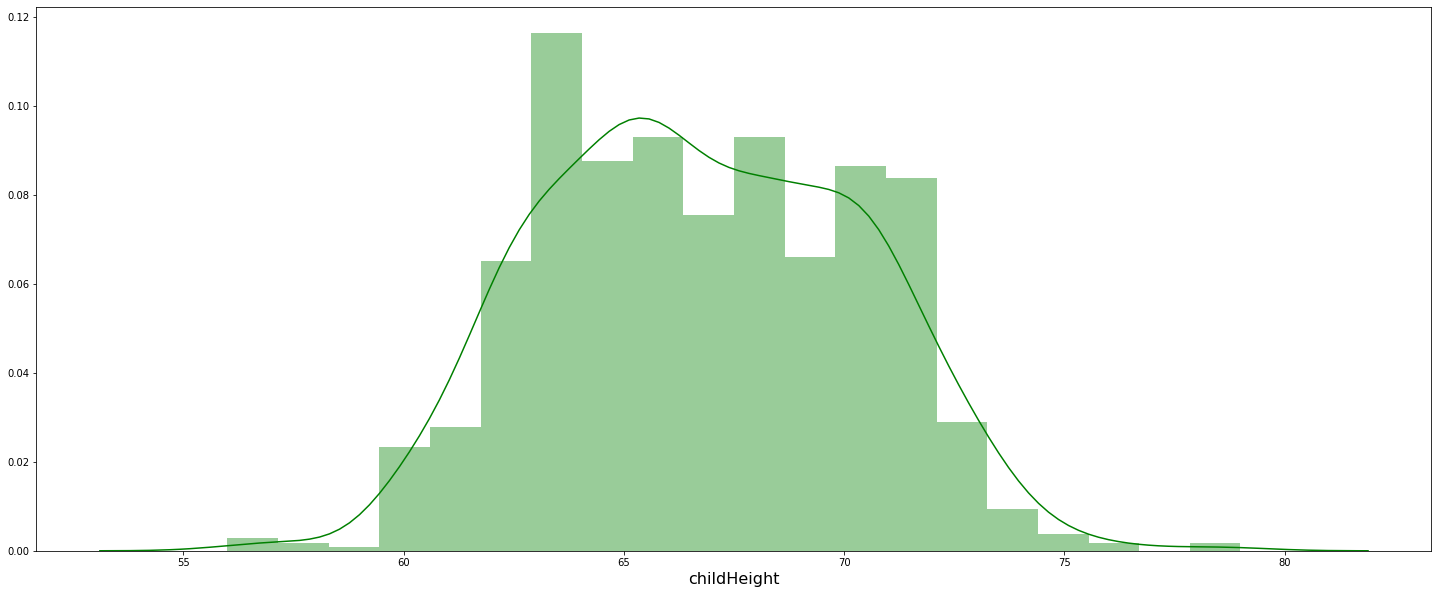

In [20]:
sns.distplot(data['childHeight'], color='green');

##### Number of children

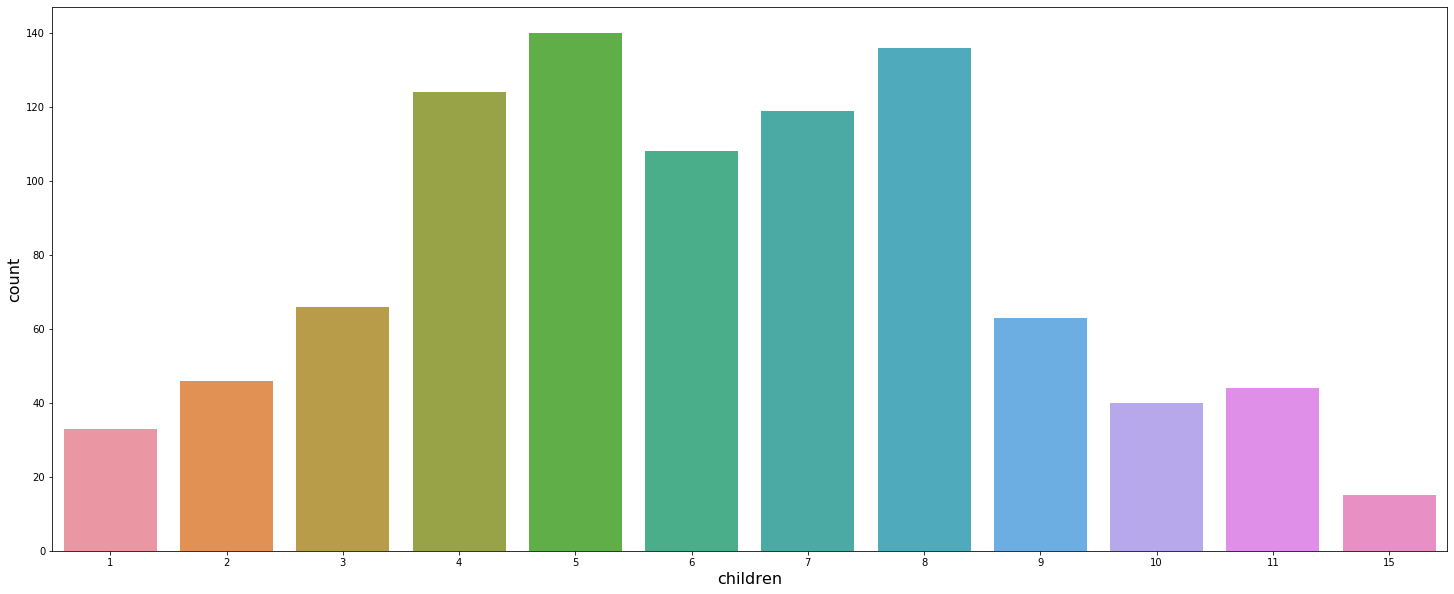

In [22]:
sns.countplot(data['children']);

#### Categorical variables

##### Gender

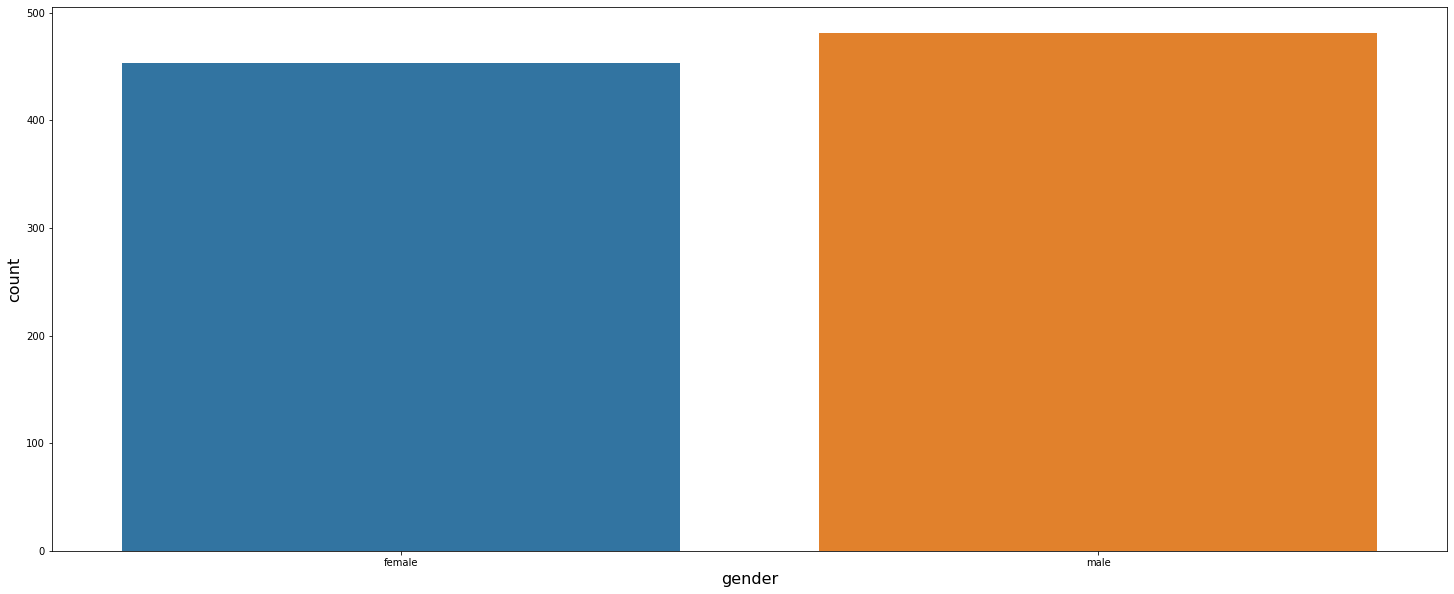

In [24]:
sns.countplot(data['gender']);

### Bivariate Analysis

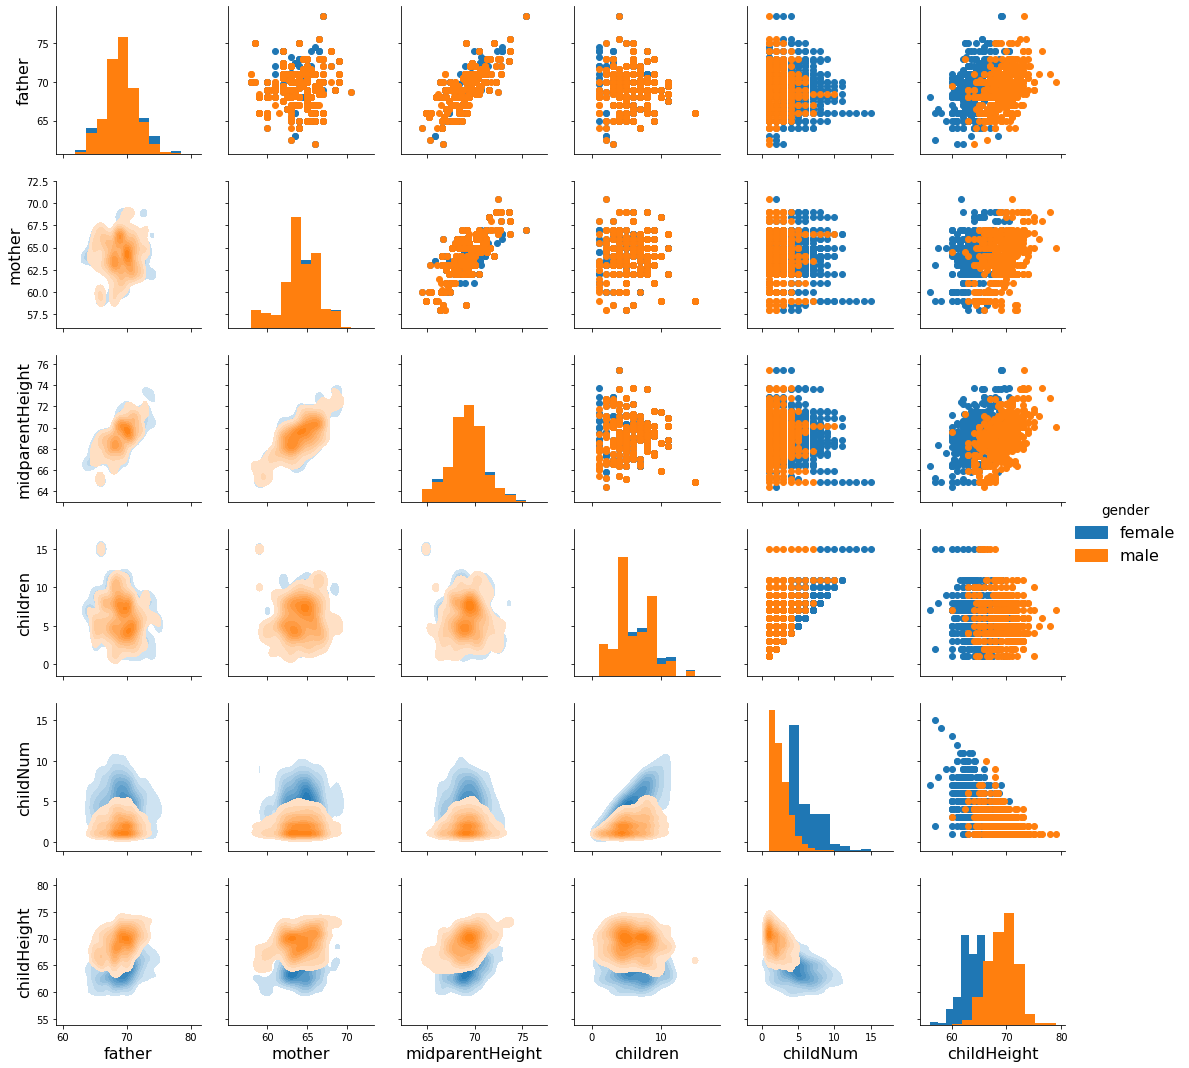

In [25]:
g = sns.PairGrid(data, hue = "gender")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

From the pairplot, we see three things:
    - father's height is positively correlated to mid-parent height
    - mother's height is positively correlated to mid-parent height
    - as the child's height increases, the probability that a child is male increases too

### Correlation Matrix

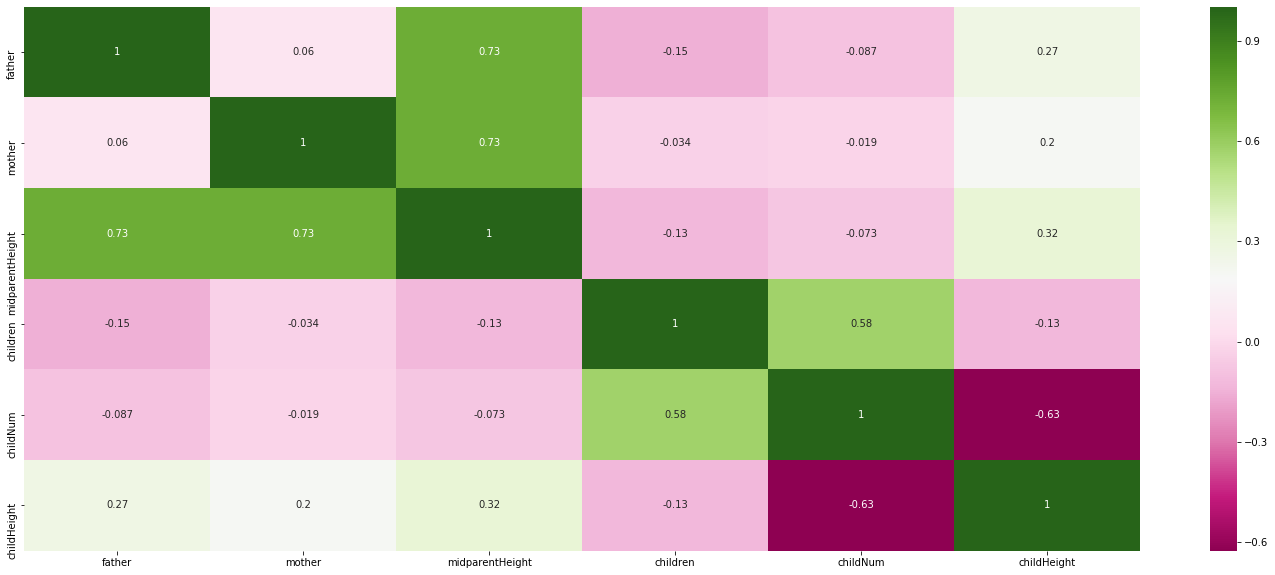

In [27]:
sns.heatmap(data.corr(), cmap="PiYG", annot=True);

In [28]:
mapping = {"male": 0, "female": 1}
data = data.replace({"gender": mapping})
data.head()

,father,mother,midparentHeight,children,childNum,gender,childHeight
0,78.5,67.0,75.43,4,1,0,73.2
1,78.5,67.0,75.43,4,2,1,69.2
2,78.5,67.0,75.43,4,3,1,69.0
3,78.5,67.0,75.43,4,4,1,69.0
4,75.5,66.5,73.66,4,1,0,73.5


# Regression models

## Linear Regression

#### Using father as a predictor

In [34]:
X = data['father']
y = data['childHeight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Node the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

# printing out statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            childHeight   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.172e+05
Date:                Tue, 17 Sep 2019   Prob (F-statistic):                        0.00
Time:                        23:30:40   Log-Likelihood:                         -1925.6
No. Observations:                 700   AIC:                                      3853.
Df Residuals:                     699   BIC:                                      3858.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.9643      0.002    466.018      0.000       0.960       0.968
==============================================================================
Omnibus:                       13.010   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.511
Skew:                           0.010   Prob(JB):                       0.0234
Kurtosis:                       2.493   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
scipy.stats.pearsonr(y_test, predictions)

(0.3167488951178835, 7.522775896242093e-07)

#### Using mother as predictor

In [39]:
X = data['mother']
y = data['childHeight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

# print out statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            childHeight   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.992e+05
Date:                Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                        12:47:52   Log-Likelihood:                         -1955.8
No. Observations:                 700   AIC:                                      3914.
Df Residuals:                     699   BIC:                                      3918.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mother         1.0412      0.002    446.267      0.000       1.037       1.046
==============================================================================
Omnibus:                        4.825   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.608
Skew:                           0.016   Prob(JB):                        0.165
Kurtosis:                       2.650   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
scipy.stats.pearsonr(y_test, predictions)

(0.2596751610086475, 5.815523036957697e-05)

#### Using father and mother as predictor

In [45]:
X = data[['father', 'mother']]
y = data['childHeight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

# print out statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            childHeight   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.276e+05
Date:                Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                        12:48:06   Log-Likelihood:                         -1868.8
No. Observations:                 700   AIC:                                      3742.
Df Residuals:                     698   BIC:                                      3751.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.5390      0.038     14.039      0.000       0.464       0.614
mother         0.4599      0.041     11.094      0.000       0.379       0.541
==============================================================================
Omnibus:                       33.277   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.116
Skew:                           0.049   Prob(JB):                     0.000860
Kurtosis:                       2.311   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
scipy.stats.pearsonr(y_test, predictions)

(0.38169897082134385, 1.5627295668382423e-09)

#### Linear regression using all predictors

In [47]:
X = data[["father",
          "mother",
          "midparentHeight",
          "children",
          "gender"]]

y = data["childHeight"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            childHeight   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.081e+05
Date:                Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                        12:48:47   Log-Likelihood:                         -2075.5
No. Observations:                 934   AIC:                                      4159.
Df Residuals:                     930   BIC:                                      4178.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
father              0.3749      0.022     16.881      0.000       0.331       0.418
mother              0.2995      0.023     13.103      0.000       0.255       0.344
midparentHeight     0.3492      0.002    222.868      0.000       0.346       0.352
children           -0.0058      0.027     -0.216      0.829      -0.058       0.047
gender             -5.2232      0.147    -35.561      0.000      -5.511      -4.935
==============================================================================
Omnibus:                        9.526   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.921
Skew:                          -0.093   Prob(JB):                      0.00156
Kurtosis:                       3.545   Cond. No.                     5.57e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.13e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
scipy.stats.pearsonr(y_test, predictions)

(0.8011227003347875, 1.238531059683083e-53)

### Standardizing the data

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
scalar = StandardScaler()

X_standard_scaled = pd.DataFrame(scalar.fit_transform(X), columns=data.columns.values.tolist()[1:6])

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=42)

### Random Forest Regressor

In [53]:
# Importing random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score

# Evaluating model's area under ROC curve
from sklearn.metrics import r2_score, accuracy_score

In [54]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))

predictions = rf.predict(X_test)

0.5818516761078705


In [55]:
scipy.stats.pearsonr(y_test, predictions)

(0.7770331446159005, 1.540408942755006e-48)

### Feature importance based on Random Forest Regressor

In [56]:
feature_importance = pd.DataFrame(rf.feature_importances_,
                                 index=X.columns,
                                 columns=['importance']).sort_values('importance', ascending=False)

In [57]:
feature_importance

,importance
gender,0.601361
midparentHeight,0.189574
children,0.072218
father,0.068945
mother,0.067901


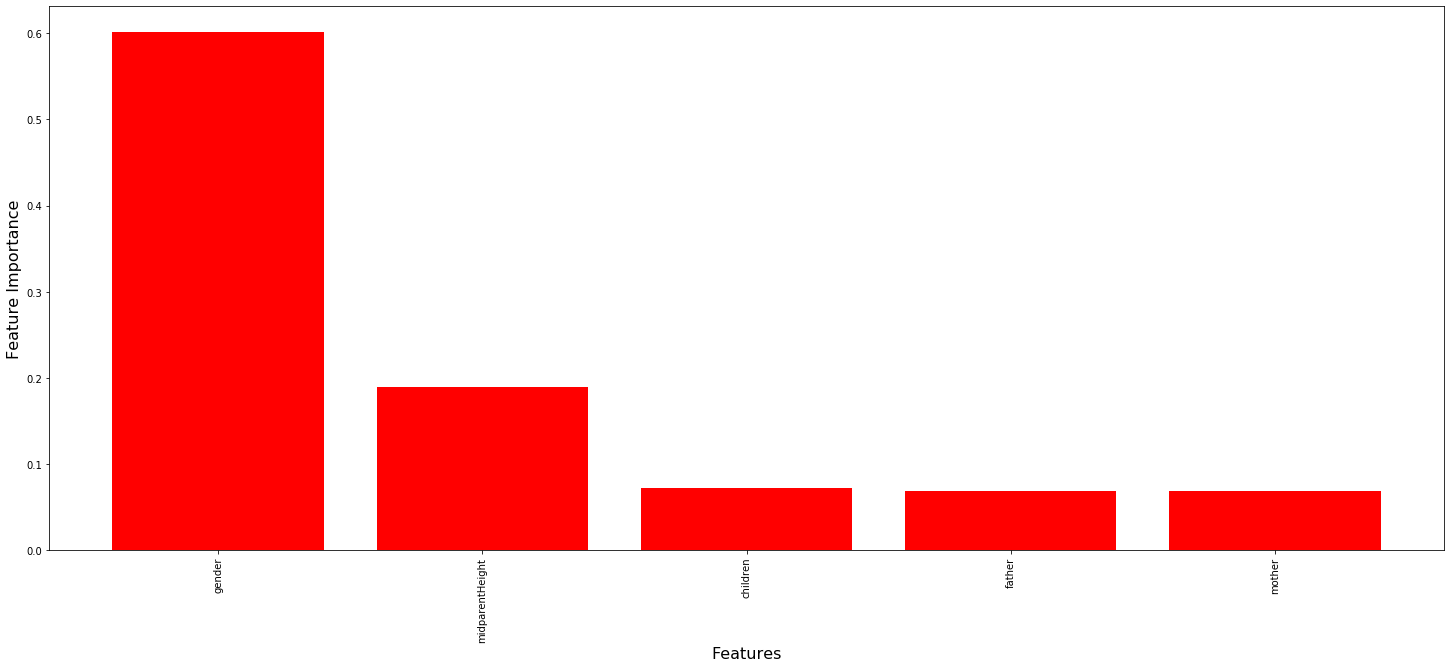

In [59]:
plt.bar(feature_importance.index, feature_importance.importance, color = "red");
plt.xlabel("Features");
plt.xticks(rotation=90);
plt.ylabel("Feature Importance");

### Deep Neural Network

In [61]:
# Keras and TensorFlow for deep learning
import keras
import tensorflow as tf

# Using keras with a Scikit-learn wrapper
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

# for defining the Neural Net
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

ModuleNotFoundError: No module named 'keras'